In [1]:
from statsmodels.tsa.arima_model import ARMA


In [2]:
import pandas as pd
df = pd.read_csv('shanghai_index_1990_12_19_to_2020_03_12.csv')
df = df[['Timestamp','Price']]
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
print(df.head())

            Timestamp   Price
Timestamp                    
1990-12-19 1990-12-19   99.98
1990-12-20 1990-12-20  104.39
1990-12-21 1990-12-21  109.13
1990-12-24 1990-12-24  114.55
1990-12-25 1990-12-25  120.25


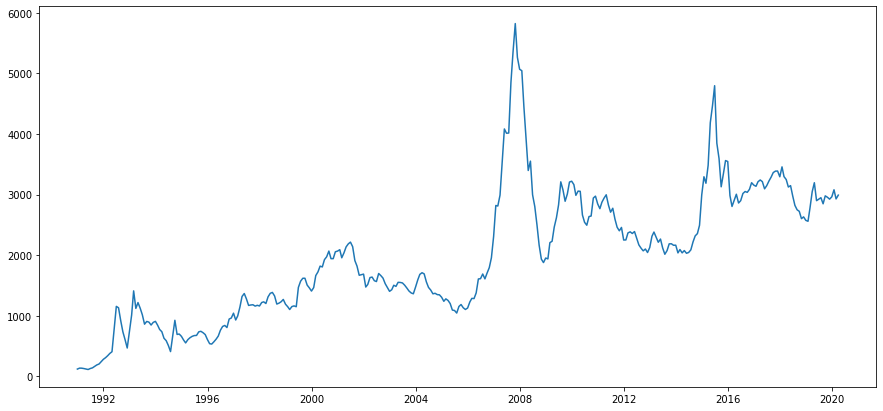

In [10]:
# 按月统计
import matplotlib.pyplot as plt
import warnings
df_month = df.resample('M').mean()
fig = plt.figure(figsize = [15,7])
plt.plot(df_month.Price,'-',label = '月')

In [4]:
# 设置参数
from itertools import product
ps = range(0,3)
qs = range(0,3)
para_ = product(ps,qs)
para_list = list(para_)
print(para_list)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [5]:
# ARMA模型参数

result = []
b_aic = float('inf')
for param in para_list:
    try:
        model = ARMA(df_month.Price,order = (param[0],param[1])).fit()
    except ValueError:
        print('参数错误:',param)
        continue
    aic = model.aic
    if aic < b_aic:
        b_model = model
        b_aic = aic
        b_param = param
    result.append([param,model.aic])
print('最优模型:',b_model.summary())                  
               
                  
                     
                     
                     

参数错误: (0, 2)
最优模型:                               ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  352
Model:                     ARMA(2, 2)   Log Likelihood               -2290.943
Method:                       css-mle   S.D. of innovations            161.347
Date:                Mon, 19 Oct 2020   AIC                           4593.887
Time:                        23:32:23   BIC                           4617.069
Sample:                    12-31-1990   HQIC                          4603.112
                         - 03-31-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1884.3830    497.857      3.785      0.000     908.601    2860.165
ar.L1.Price     0.4820      0.129      3.726      0.000       0.228       0.735
ar.L2.Price     0.4832      0

In [6]:
# 设置date
from datetime import datetime,timedelta
import calendar
data = df_month[['Price']]
date = pd.to_datetime(data.index[len(data)-1])
date_list = []
for i in range(3):
    year = date.year
    month = date.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month+1
    month_days = calendar.monthrange(year,month)[1]
    date = date + timedelta(days=month_days)
    date_list.append(date)
print('date_list:',date_list)

date_list: [Timestamp('2020-04-30 00:00:00', freq='M'), Timestamp('2020-05-31 00:00:00', freq='M'), Timestamp('2020-06-30 00:00:00', freq='M')]


In [7]:
# 预测未来三个月
import numpy as np
pred = pd.DataFrame(index = date_list,columns = df_month.columns)
data = pd.concat([data,pred])
data['forecast'] = b_model.predict(start = 0,end = len(data))
data['forecast'][0] = np.NaN
data

,Price,forecast
1990-12-31,116.990000,NaN
1991-01-31,132.628182,138.775140
1991-02-28,131.887778,167.290065
1991-03-31,126.011429,161.369935
1991-04-30,118.426818,147.410489
...,...,...
2020-02-29,2927.513035,3097.923463
2020-03-31,2990.415289,2847.844469
2020-04-30,NaN,2982.497166
2020-05-31,NaN,3000.914092


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27818 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

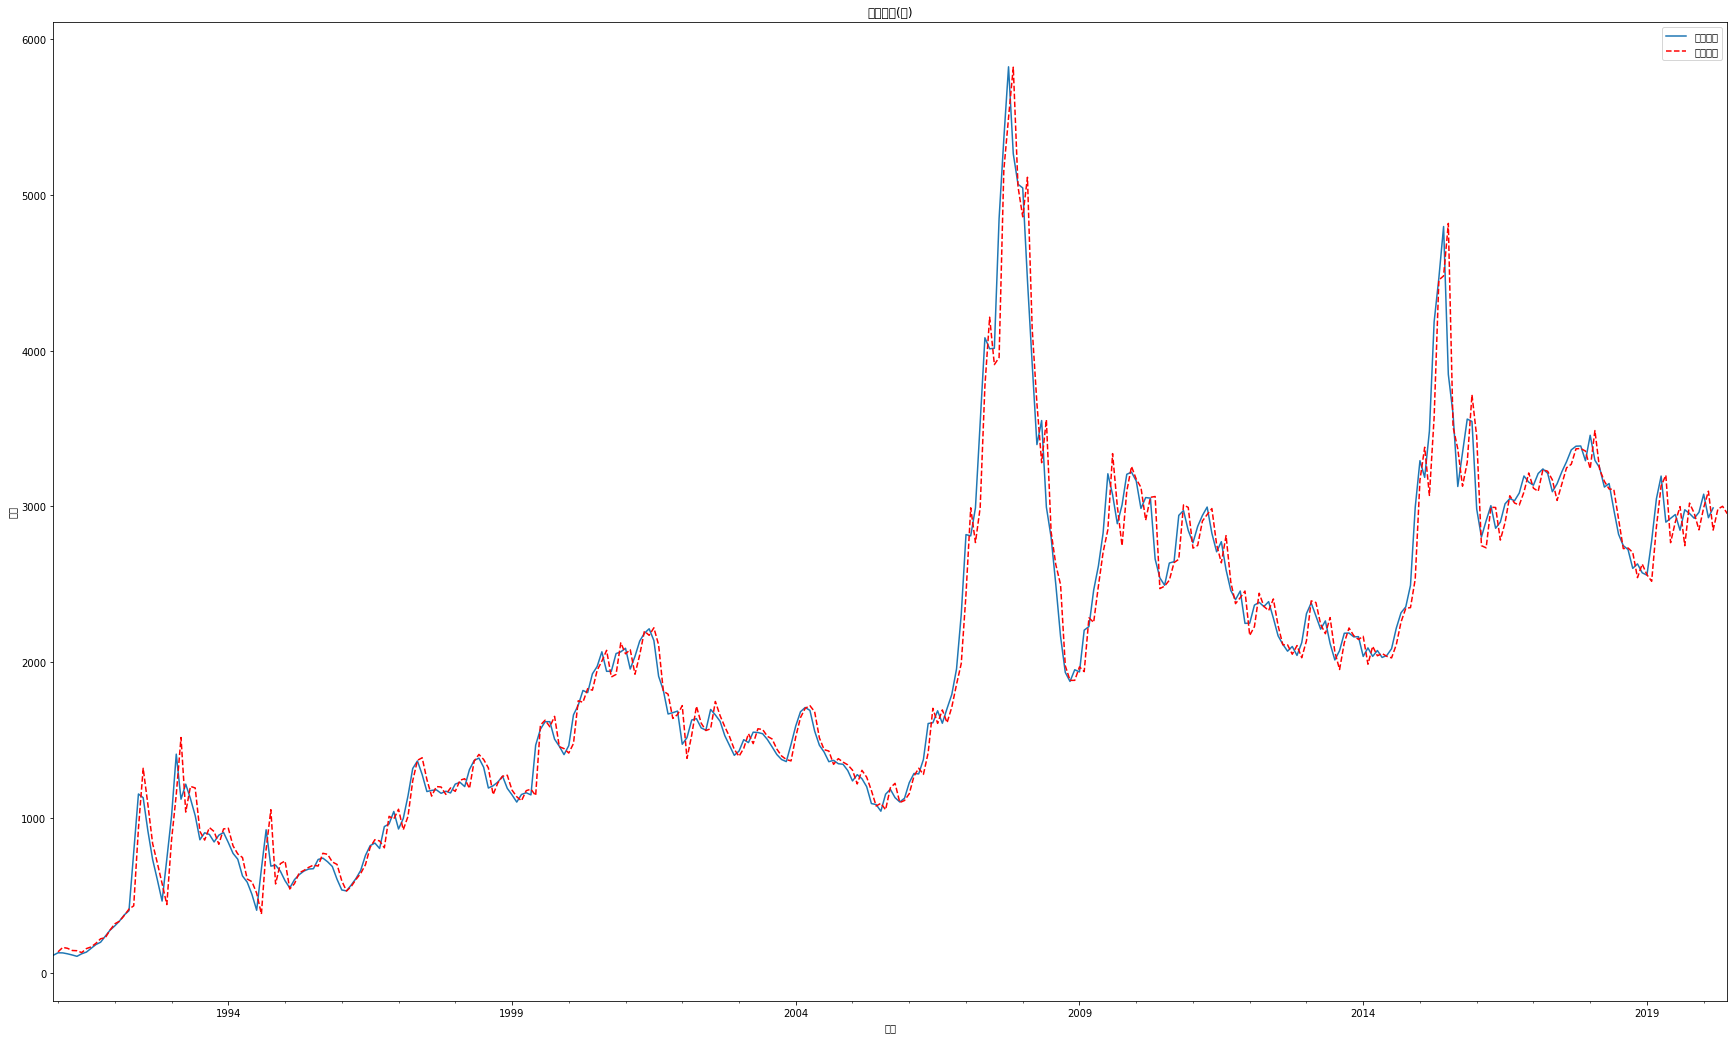

In [9]:
# 预测与实际对比

plt.figure(figsize = (30,18))
data.Price.plot(label = '实际指数')
data.forecast.plot(color = 'r',ls = '--',label = '预测指数')
plt.legend()
plt.title('沪市指数(月)')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()